# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [7]:
df =pd.read_csv("ionosphere_data.csv")
df.head().T

,0,1,2,3,4
feature1,1,1,1,1,1
feature2,0,0,0,0,0
feature3,0.99539,1.0,1.0,1.0,1.0
feature4,-0.05889,-0.18829,-0.03365,-0.45161,-0.02401
feature5,0.85243,0.93035,1.0,1.0,0.9414
feature6,0.02306,-0.36156,0.00485,1.0,0.06531
feature7,0.83398,-0.10868,1.0,0.71216,0.92106
feature8,-0.37708,-0.93597,-0.12062,-1.0,-0.23255
feature9,1.0,1.0,0.88965,0.0,0.77152
feature10,0.0376,-0.04549,0.01198,0.0,-0.16399


In [10]:
df.isna().any()

feature1     False
feature2     False
feature3     False
feature4     False
feature5     False
feature6     False
feature7     False
feature8     False
feature9     False
feature10    False
feature11    False
feature12    False
feature13    False
feature14    False
feature15    False
feature16    False
feature17    False
feature18    False
feature19    False
feature20    False
feature21    False
feature22    False
feature23    False
feature24    False
feature25    False
feature26    False
feature27    False
feature28    False
feature29    False
feature30    False
feature31    False
feature32    False
feature33    False
feature34    False
label        False
dtype: bool

In [11]:
df.fillna(df.mean())

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [20]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state = 101)

print("X_train size :", X_train.shape)
print("X_test size :", X_test.shape)
print("y_train size :", y_train.shape)
print("y_test size :", y_test.shape)

X_train size : (210, 34)
X_test size : (141, 34)
y_train size : (210,)
y_test size : (141,)


In [33]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [37]:
model = tf.keras.Sequential()
model.add(Input(X_train_std.shape[1]))
model.add(Dense(10,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics =['accuracy'])

In [38]:
history = model.fit(X_train, y_train_enc, validation_data=(X_test, y_test_enc), epochs = 100, verbose = 2)

Epoch 1/100
7/7 - 1s - loss: 0.6260 - accuracy: 0.7381 - val_loss: 0.6226 - val_accuracy: 0.7305
Epoch 2/100
7/7 - 0s - loss: 0.6026 - accuracy: 0.7571 - val_loss: 0.6035 - val_accuracy: 0.7376
Epoch 3/100
7/7 - 0s - loss: 0.5817 - accuracy: 0.7857 - val_loss: 0.5862 - val_accuracy: 0.7376
Epoch 4/100
7/7 - 0s - loss: 0.5655 - accuracy: 0.7905 - val_loss: 0.5720 - val_accuracy: 0.7518
Epoch 5/100
7/7 - 0s - loss: 0.5495 - accuracy: 0.7952 - val_loss: 0.5606 - val_accuracy: 0.7518
Epoch 6/100
7/7 - 0s - loss: 0.5358 - accuracy: 0.8095 - val_loss: 0.5504 - val_accuracy: 0.7447
Epoch 7/100
7/7 - 0s - loss: 0.5230 - accuracy: 0.8095 - val_loss: 0.5412 - val_accuracy: 0.7660
Epoch 8/100
7/7 - 0s - loss: 0.5105 - accuracy: 0.8143 - val_loss: 0.5331 - val_accuracy: 0.7730
Epoch 9/100
7/7 - 0s - loss: 0.4998 - accuracy: 0.8143 - val_loss: 0.5255 - val_accuracy: 0.7730
Epoch 10/100
7/7 - 0s - loss: 0.4879 - accuracy: 0.8190 - val_loss: 0.5177 - val_accuracy: 0.7872
Epoch 11/100
7/7 - 0s - loss:

Epoch 85/100
7/7 - 0s - loss: 0.0785 - accuracy: 0.9810 - val_loss: 0.3003 - val_accuracy: 0.9007
Epoch 86/100
7/7 - 0s - loss: 0.0775 - accuracy: 0.9810 - val_loss: 0.2991 - val_accuracy: 0.9007
Epoch 87/100
7/7 - 0s - loss: 0.0767 - accuracy: 0.9810 - val_loss: 0.2993 - val_accuracy: 0.9007
Epoch 88/100
7/7 - 0s - loss: 0.0762 - accuracy: 0.9857 - val_loss: 0.2989 - val_accuracy: 0.9007
Epoch 89/100
7/7 - 0s - loss: 0.0750 - accuracy: 0.9857 - val_loss: 0.3057 - val_accuracy: 0.9007
Epoch 90/100
7/7 - 0s - loss: 0.0746 - accuracy: 0.9857 - val_loss: 0.3070 - val_accuracy: 0.9007
Epoch 91/100
7/7 - 0s - loss: 0.0738 - accuracy: 0.9857 - val_loss: 0.3055 - val_accuracy: 0.9007
Epoch 92/100
7/7 - 0s - loss: 0.0730 - accuracy: 0.9857 - val_loss: 0.3053 - val_accuracy: 0.9007
Epoch 93/100
7/7 - 0s - loss: 0.0724 - accuracy: 0.9857 - val_loss: 0.3027 - val_accuracy: 0.9007
Epoch 94/100
7/7 - 0s - loss: 0.0719 - accuracy: 0.9857 - val_loss: 0.3067 - val_accuracy: 0.9007
Epoch 95/100
7/7 - 0

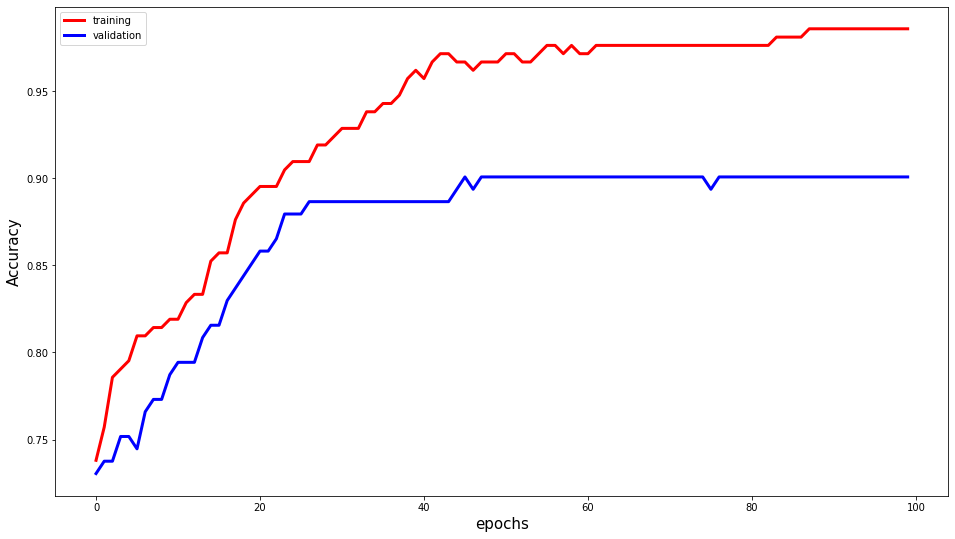

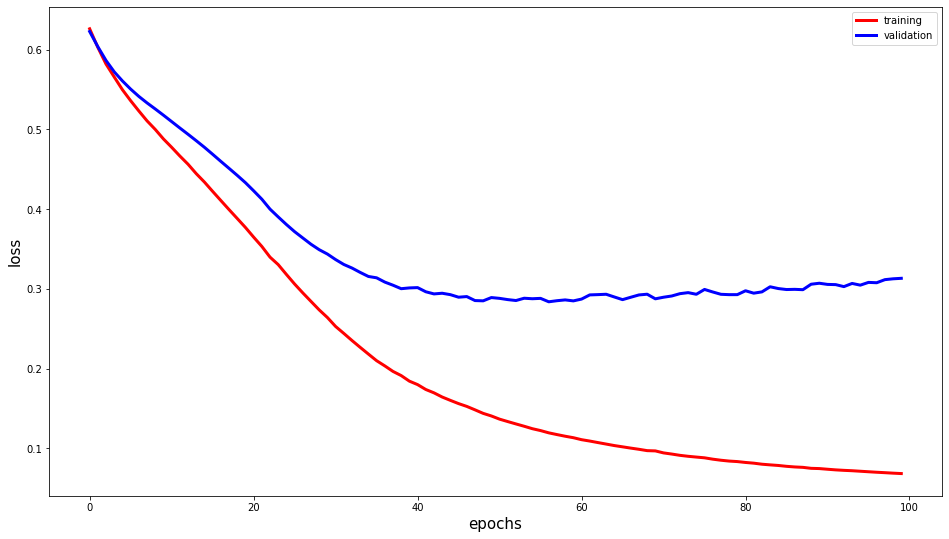

In [43]:
# Plot history
def plot_hist(history):
    fig = plt.figure(figsize=(16,9))
    plt.rcParams['axes.labelsize'] = 15
    plt.plot(history.history['accuracy'],'red',linewidth=3.0, label ="training")
    plt.plot(history.history['val_accuracy'],'blue',linewidth=3.0, label = "validation")
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot history

    fig = plt.figure(figsize=(16,9))
    plt.rcParams['axes.labelsize'] = 15
    plt.plot(history.history['loss'],'red',linewidth=3.0, label ="training")
    plt.plot(history.history['val_loss'],'blue',linewidth=3.0, label = "validation")
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
plot_hist(history)

In [42]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test_std, y_test_enc, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test_std[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
2/2 [==============================] - 0s 0s/step - loss: 1.0932 - accuracy: 0.6879
test loss, test acc: [1.0931906700134277, 0.6879432797431946]
Generate predictions for 3 samples
predictions shape: (3, 1)


In [46]:
model = tf.keras.Sequential()
model.add(Input(X_train_std.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics =['accuracy'])

history = model.fit(X_train, y_train_enc, validation_data=(X_test, y_test_enc), epochs = 100, verbose = 2)

Epoch 1/100
7/7 - 1s - loss: 0.6934 - accuracy: 0.5571 - val_loss: 0.6202 - val_accuracy: 0.7801
Epoch 2/100
7/7 - 0s - loss: 0.6038 - accuracy: 0.7238 - val_loss: 0.5766 - val_accuracy: 0.6879
Epoch 3/100
7/7 - 0s - loss: 0.6051 - accuracy: 0.6905 - val_loss: 0.5510 - val_accuracy: 0.6454
Epoch 4/100
7/7 - 0s - loss: 0.5400 - accuracy: 0.7238 - val_loss: 0.5296 - val_accuracy: 0.7021
Epoch 5/100
7/7 - 0s - loss: 0.5309 - accuracy: 0.7714 - val_loss: 0.4866 - val_accuracy: 0.7872
Epoch 6/100
7/7 - 0s - loss: 0.4656 - accuracy: 0.8095 - val_loss: 0.4402 - val_accuracy: 0.8227
Epoch 7/100
7/7 - 0s - loss: 0.4523 - accuracy: 0.8190 - val_loss: 0.3937 - val_accuracy: 0.8794
Epoch 8/100
7/7 - 0s - loss: 0.4213 - accuracy: 0.8476 - val_loss: 0.3550 - val_accuracy: 0.8794
Epoch 9/100
7/7 - 0s - loss: 0.3960 - accuracy: 0.8619 - val_loss: 0.3323 - val_accuracy: 0.8936
Epoch 10/100
7/7 - 0s - loss: 0.3085 - accuracy: 0.9095 - val_loss: 0.3262 - val_accuracy: 0.8865
Epoch 11/100
7/7 - 0s - loss:

Epoch 85/100
7/7 - 0s - loss: 0.0258 - accuracy: 0.9905 - val_loss: 0.3008 - val_accuracy: 0.9220
Epoch 86/100
7/7 - 0s - loss: 0.0358 - accuracy: 0.9905 - val_loss: 0.2979 - val_accuracy: 0.9220
Epoch 87/100
7/7 - 0s - loss: 0.0282 - accuracy: 0.9952 - val_loss: 0.2876 - val_accuracy: 0.9220
Epoch 88/100
7/7 - 0s - loss: 0.0432 - accuracy: 0.9810 - val_loss: 0.2061 - val_accuracy: 0.9433
Epoch 89/100
7/7 - 0s - loss: 0.0448 - accuracy: 0.9810 - val_loss: 0.1696 - val_accuracy: 0.9574
Epoch 90/100
7/7 - 0s - loss: 0.0408 - accuracy: 0.9905 - val_loss: 0.1864 - val_accuracy: 0.9574
Epoch 91/100
7/7 - 0s - loss: 0.0572 - accuracy: 0.9857 - val_loss: 0.1999 - val_accuracy: 0.9574
Epoch 92/100
7/7 - 0s - loss: 0.0289 - accuracy: 0.9952 - val_loss: 0.1975 - val_accuracy: 0.9504
Epoch 93/100
7/7 - 0s - loss: 0.0254 - accuracy: 0.9905 - val_loss: 0.1975 - val_accuracy: 0.9504
Epoch 94/100
7/7 - 0s - loss: 0.0381 - accuracy: 0.9952 - val_loss: 0.2034 - val_accuracy: 0.9433
Epoch 95/100
7/7 - 0

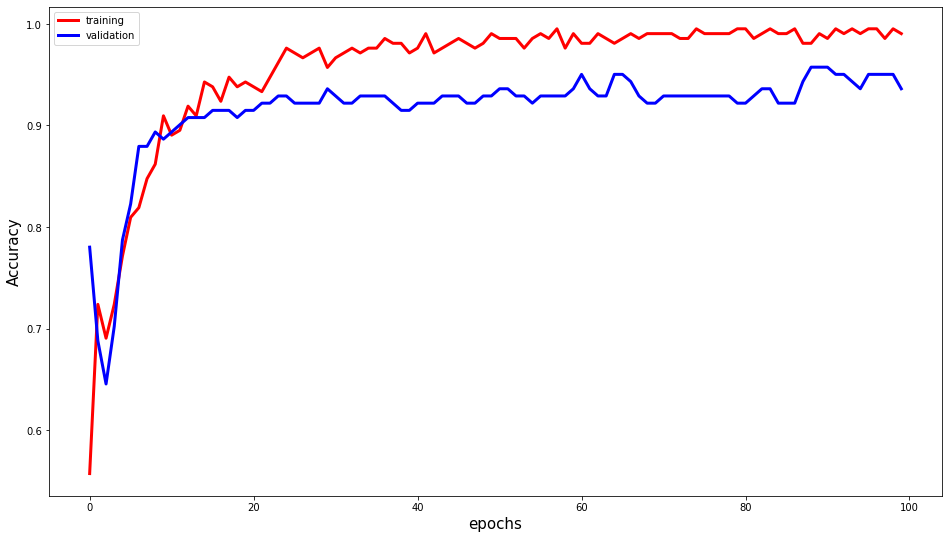

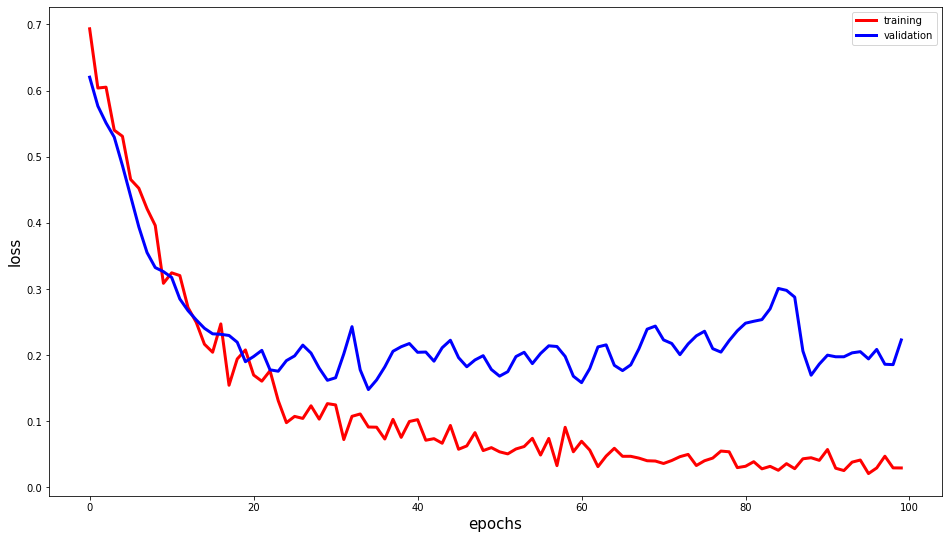

In [47]:
plot_hist(history)

In [68]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test_std, y_test_enc)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 10 samples")
predictions = model.predict(X_test_std[:10])
print("predictions shape:", predictions.shape)

Evaluate on test data
5/5 [==============================] - 0s 2ms/step - loss: 3.3451 - accuracy: 0.6525
test loss, test acc: [3.3450939655303955, 0.652482271194458]
Generate predictions for 10 samples
predictions shape: (10, 1)


In [70]:
y_test[:10]

array(['g', 'g', 'g', 'g', 'b', 'g', 'b', 'g', 'b', 'b'], dtype=object)

In [69]:
le.inverse_transform(np.rint(predictions).astype(int))

array(['b', 'g', 'g', 'g', 'b', 'g', 'b', 'b', 'b', 'b'], dtype=object)